In [3]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('../data/fastTagDataset.csv')
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud


# ✍️Getting to know Data

In [31]:
df.shape

(5000, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [33]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [34]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/24/2023 2:55,Bus,FTG-459-WSX-543,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA37AB3456,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


#### 🤔🤔🤔🤔Observation - 1
- FasTag ID has 549 null values
- No duplicate entries
- datatypes are almost correct

In [37]:
print(df.columns)

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')


In [38]:
print("Vehicle Type : ", df['Vehicle_Type'].unique())
print("TollBooth ID : ", df['TollBoothID'].unique())
print("Lane Type : ", df['Lane_Type'].unique())
print("Vehicle Dimensions : ", df['Vehicle_Dimensions'].unique())
print("Fraud Indicator : ", df['Fraud_indicator'].unique())
print("Geographical Location : ", df['Geographical_Location'].unique())

Vehicle Type :  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
TollBooth ID :  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Lane Type :  ['Express' 'Regular']
Vehicle Dimensions :  ['Large' 'Small' 'Medium']
Fraud Indicator :  ['Fraud' 'Not Fraud']
Geographical Location :  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


# 🤔Data Visualisation

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


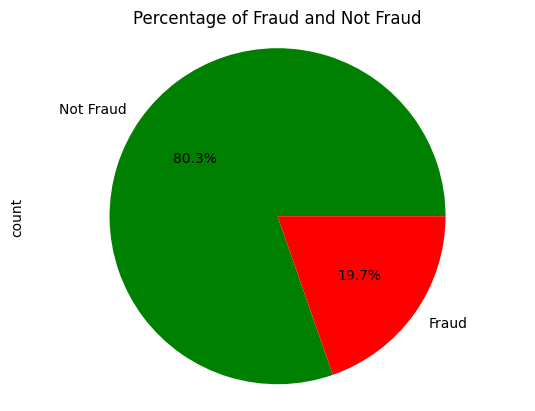

In [41]:
#percentage of fraud and not fraud
print(df['Fraud_indicator'].value_counts())
df['Fraud_indicator'].value_counts().plot(kind='pie',
                                          autopct='%1.1f%%',
                                          colors=['green', 'red'])
plt.title('Percentage of Fraud and Not Fraud')
plt.axis('equal')
plt.show()

In [42]:
#analysis of different vehicle types
# on the basis of fraud indicator (fraud and not fraud)
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

Text(0.5, 1.0, 'Vehicle Type')

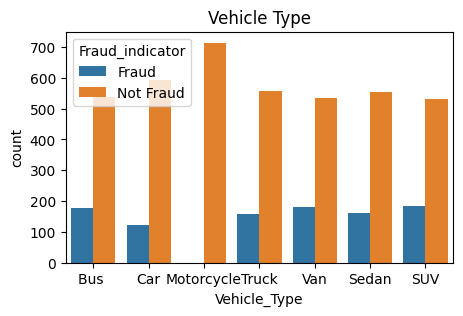

In [43]:
# Vehicle type ke basis par fraud
plt.figure(figsize=(5,3))
sns.countplot(x='Vehicle_Type',
              data=df, 
              hue='Fraud_indicator').set_title('Vehicle Type')   

Text(0.5, 1.0, 'Vehicle Dimensions')

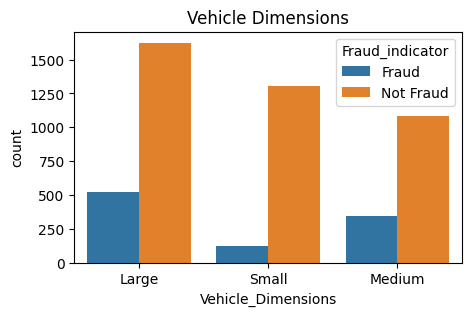

In [44]:
    # Vehicle Dimensions ke basis par fraud
plt.figure(figsize=(5,3))
sns.countplot(x='Vehicle_Dimensions',
              data=df, 
              hue='Fraud_indicator').set_title('Vehicle Dimensions')   

Text(0.5, 1.0, 'Different Toll Booths')

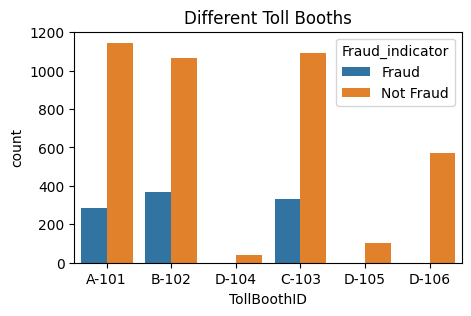

In [45]:
# Toll Booth ID ke basis par fraud
plt.figure(figsize=(5,3))
sns.countplot(x='TollBoothID',
              data=df, 
              hue='Fraud_indicator').set_title('Different Toll Booths')   

Text(0.5, 1.0, 'Lane Type')

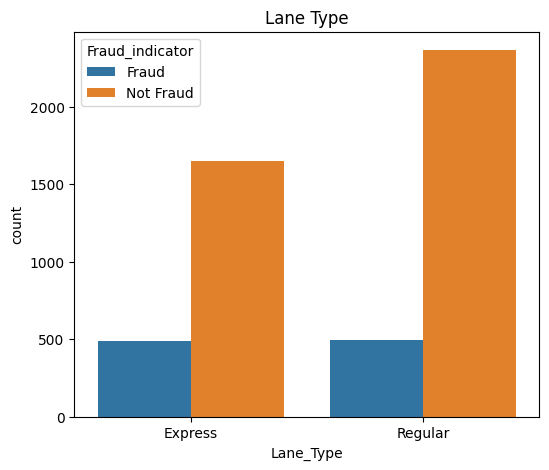

In [46]:
# Lane type ke basis par fraud
plt.figure(figsize=(6,5))
sns.countplot(x='Lane_Type',
              data=df, 
              hue='Fraud_indicator').set_title('Lane Type')   

## 🤔Observations - 2
- motorcycles are clearn => not involved in any fraud
- toll booths 104, 105 and 106 have no fraud detected but others have mixed data
- Express way has higher fraud precentage based on vehicle then regular
- very less small vehicles are involved in fraud

# 🤔Distribution 

In [47]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

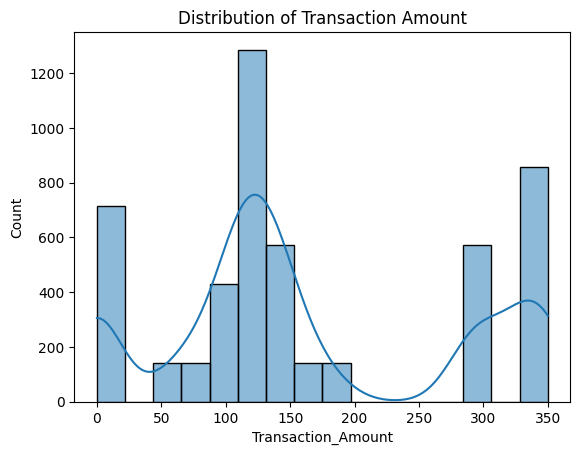

In [48]:

sns.histplot(df["Transaction_Amount"], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction_Amount')
plt.ylabel('Count')
plt.show()

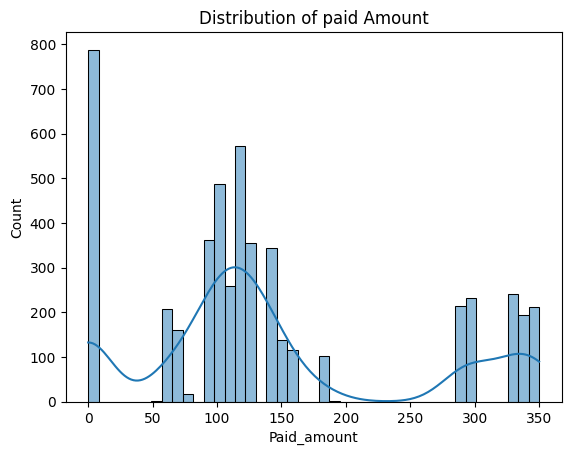

In [49]:
sns.histplot(df["Amount_paid"], kde=True)
plt.title('Distribution of paid Amount')
plt.xlabel('Paid_amount')
plt.ylabel('Count')
plt.show()

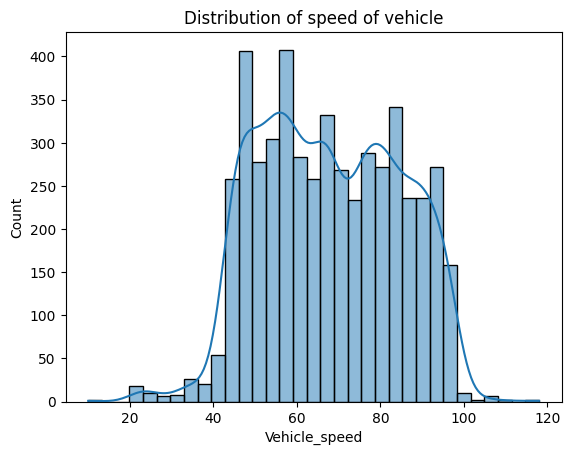

In [50]:
sns.histplot(df["Vehicle_Speed"], kde=True)
plt.title('Distribution of speed of vehicle')
plt.xlabel('Vehicle_speed')
plt.ylabel('Count')
plt.show()

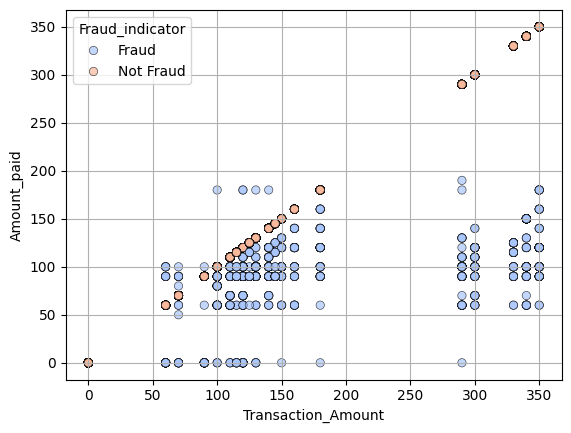

In [51]:
sns.scatterplot(
    x="Transaction_Amount",
    y="Amount_paid",
    hue="Fraud_indicator",
    data=df,
    palette="coolwarm",
    alpha=0.7,
    edgecolor="black"
)
plt.grid()

## 🤔Observation - 3
-  =>  if(transation_amounnt ) != amount paid ==> fraud
-  =>  if(transation_amounnt ) == amount paid ==> not fraud

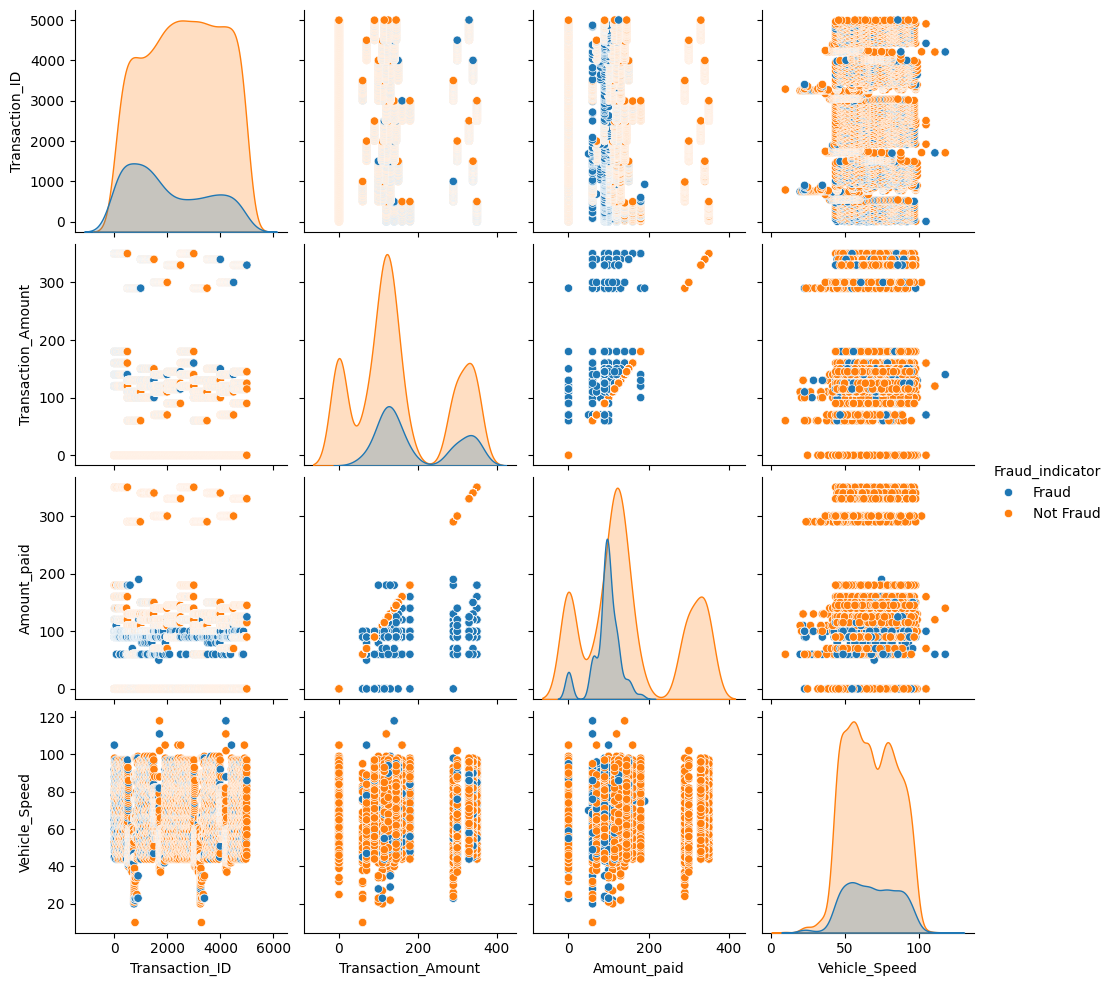

In [52]:
sns.pairplot(df, hue='Fraud_indicator')

In [54]:
df.to_csv('../data/preprocessedData.csv', index=False)